In [9]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from python.faddeev1D3B import ReducedFaddeev1D3B, Faddeev1D3B, MulticomponentRHS
from python.plot import AnimationWF

sp.show_config()
np.show_config()

lapack_mkl_info:
  NOT AVAILABLE
openblas_lapack_info:
    libraries = ['openblas', 'openblas']
    library_dirs = ['/usr/local/lib']
    language = c
    define_macros = [('HAVE_CBLAS', None)]
    runtime_library_dirs = ['/usr/local/lib']
lapack_opt_info:
    libraries = ['openblas', 'openblas']
    library_dirs = ['/usr/local/lib']
    language = c
    define_macros = [('HAVE_CBLAS', None)]
    runtime_library_dirs = ['/usr/local/lib']
blas_mkl_info:
  NOT AVAILABLE
blis_info:
  NOT AVAILABLE
openblas_info:
    libraries = ['openblas', 'openblas']
    library_dirs = ['/usr/local/lib']
    language = c
    define_macros = [('HAVE_CBLAS', None)]
    runtime_library_dirs = ['/usr/local/lib']
blas_opt_info:
    libraries = ['openblas', 'openblas']
    library_dirs = ['/usr/local/lib']
    language = c
    define_macros = [('HAVE_CBLAS', None)]
    runtime_library_dirs = ['/usr/local/lib']
blas_mkl_info:
  NOT AVAILABLE
blis_info:
  NOT AVAILABLE
openblas_info:
    libraries = ['openblas'

In [14]:
cut_x = 0.3
cut_y = 0.1
gr_x = np.vectorize(lambda x: x**3/(cut_x * cut_x) if x < cut_x else x)
gr_y = np.vectorize(lambda x: x**3/(cut_y * cut_y) if abs(x) < cut_y  else x)

N  = 20
Nb = 20
Ng = 10

masses = [1836.0, 1836.0, 1.0]
regulizers = [0.25, 0.25, 0.03]
rhs =MulticomponentRHS(masses=masses)

agx = 55*np.linspace(-1, 1, N)**3
agy = 101*np.linspace(-1, 1, N)

bgx = 55*np.linspace(-1, 1, Nb)**3
bgy = 100*np.linspace(-1, 1, Nb)

ggx = 10*np.linspace(-1, 1, Ng)
ggy = 50*np.linspace(-1, 1, Ng)

grids = [agx, agy, bgx, bgy, ggx, ggy]

#h = Faddeev1D3B(grids, masses=masses, regulizers=regulizers)
#h.init_fhamiltonian()
hr = ReducedFaddeev1D3B(grids, masses=masses, regulizers=regulizers)
hr.init_fhamiltonian()
#sp.sparse.block_diag((h.alpha.laplace, h.beta.laplace,h.gamma.laplace))

[1836.0, 1836.0, 1.0]
3673.0
[1.0, 1.0, 1.0000000000000002, 1.0, 1.0, 1.0000000000000002, 1.0000000000000004, 1.0000000000000004, 1.0]
reduced mass: m1=1.9989112683723465, m2=1836.4998638714944
index 0
yvals
reduced mass: m1=1.9989112683723465, m2=1836.4998638714944
index 1
yvals
reduced mass: m1=1835.9999999999998, m2=1.9994554859787639
index 2
yvals
[1836.0, 1836.0, 1.0]
3673.0
[1.0, 1.0, 1.0000000000000002, 1.0, 1.0, 1.0000000000000002, 1.0000000000000004, 1.0000000000000004, 1.0]
[[ 882.17951366  876.04387457  871.55227502 ... -871.55227502
  -876.04387457 -882.17951366]
 [ -51.70768403  -51.70779428  -51.70787499 ...   51.70787499
    51.70779428   51.70768403]]


In [3]:
# from itertools import product

# list(product(hr.alpha.spl_x.collocPoints, hr.alpha.spl_y.collocPoints))

In [100]:
# rhs.convert_gridpoints(hr.beta, hr.alpha).T

In [4]:
rhs.transforms[0][2] @ np.vstack([ggx, ggy])

array([[ 4.99795877e+01,  2.20359210e+01, -5.90774565e+00,
        -3.38514123e+01, -6.17950790e+01, -8.97387456e+01,
        -1.17682412e+02, -1.45626079e+02, -1.73569746e+02,
        -2.01513412e+02],
       [ 8.98092910e-04,  1.11196087e+00,  2.22302365e+00,
         3.33408643e+00,  4.44514921e+00,  5.55621199e+00,
         6.66727476e+00,  7.77833754e+00,  8.88940032e+00,
         1.00004631e+01]])

In [5]:
rhs.transforms[0][2]

array([[-1.51533825e+01, -9.99591753e-01],
       [ 1.00013612e+00, -1.79618582e-05]])

In [6]:
rhs.transforms[1][2]

array([[-1.51533825e+01,  9.99591753e-01],
       [-1.00013612e+00, -1.79618582e-05]])

In [119]:
rhs.transforms[1][2]

array([[-5.44365814e-04,  1.00000000e+00],
       [-9.99727817e-01, -5.00000000e-01]])

In [8]:
rhs.transforms[0][1] @ np.vstack([agx, agy])

array([[ 5.49664331e+01,  3.93708411e+01,  2.70450821e+01,
         1.76044698e+01,  1.06643181e+01,  5.83994066e+00,
         2.74665127e+00,  9.99763685e-01,  2.14591688e-01,
         6.44903991e-03, -9.35049120e-03, -2.17493139e-01,
        -1.00266514e+00, -2.74955272e+00, -5.84284212e+00,
        -1.06672196e+01, -1.76073713e+01, -2.70479835e+01,
        -3.93737425e+01, -5.49693345e+01],
       [ 1.76804398e+03,  1.28868781e+03,  9.08497175e+02,
         6.15805535e+02,  3.98946359e+02,  2.46253115e+02,
         1.46059271e+02,  8.66982914e+01,  5.65036448e+01,
         4.38087978e+01,  3.69472174e+01,  2.42523704e+01,
        -5.94227611e+00, -6.53032553e+01, -1.65497100e+02,
        -3.18190344e+02, -5.35049520e+02, -8.27741160e+02,
        -1.20793180e+03, -1.68728797e+03]])

In [ ]:
rhs.transforms[1][2] @ np.vstack([bgx, bgy])

In [15]:
evals, evec = h.exp_hamiltonian(dt=0.1, k=15)
print(evals)
#revals, revec = hr.exp_hamiltonian(dt=0.5, k=35, which='LM')
#print(revals)

init
lu
<class 'scipy.sparse.csc.csc_matrix'>
log


ValueError: math domain error

In [ ]:
h = Faddeev1D3B(grids, regulizers=regulizers)
h.init_fhamiltonian()

evals, evec = h.precondition_hamiltonian(lE=-0.66, rE=-0.58, debug=True, k=1, which='LM')
print(evals)

/Users/Aleksei_Kornev2/physics/Faddeev/TDFE/venv/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: The following kwargs were not used by contour: 'cvals'


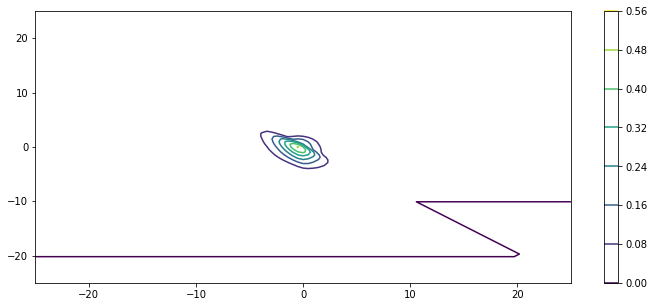

In [103]:
fig = plt.figure(figsize=(12,5))

x = np.linspace(-25, 25, 105)
y = np.linspace(-25, 25, 105)
X, Y = np.meshgrid(x, y)


cvals = np.linspace(0, 1, 100)

n_state = 0
coefs = revec[:, n_state].copy()
#print(np.sum(coefs[:hr.alpha.dim]))
#print(np.zeros(h.alpha.dim))

#print(np.allclose(coefs[:h.alpha.dim], np.zeros(h.alpha.dim), atol=1e-8))
#coefs[h.alpha.dim:] = 0
#coefs[:h.alpha.dim] = 0
#coefs[h.alpha.dim+h.beta.dim:] = 0


psi = np.array([[hr.splinef(coefs, xi, yi, idx=1) for xi in x] for yi in y])
psi_real = np.real(psi)
psi_imag = np.imag(psi)
psi_ampl = np.abs(psi)

contour1 = plt.contour(X, Y, psi_ampl, cvals=cvals)
fig.colorbar(contour1)

/Users/Aleksei_Kornev2/physics/Faddeev/TDFE/venv/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: The following kwargs were not used by contour: 'cvals'


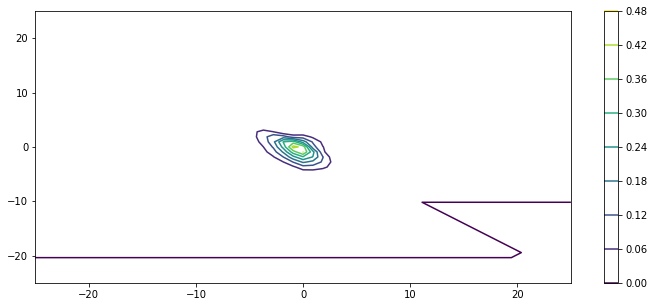

In [104]:
fig = plt.figure(figsize=(12,5))

x = np.linspace(-25, 25, 55)
y = np.linspace(-25, 25, 55)
X, Y = np.meshgrid(x, y)

cvals = np.linspace(0, 1, 100)

coefs = revec[:, n_state].copy()
# coefs[:h.alpha.dim] = 0
# coefs[h.alpha.dim+h.beta.dim:] = 0


psi = np.array([[hr.splinef(coefs, xi, yi, idx=1) for xi in x] for yi in y])
psi_real = np.real(psi)
psi_imag = np.imag(psi)
psi_ampl = np.abs(psi)

contour1 = plt.contour(X, Y, psi_ampl, cvals=cvals)
fig.colorbar(contour1)

/Users/Aleksei_Kornev2/physics/Faddeev/TDFE/venv/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: The following kwargs were not used by contour: 'cvals'


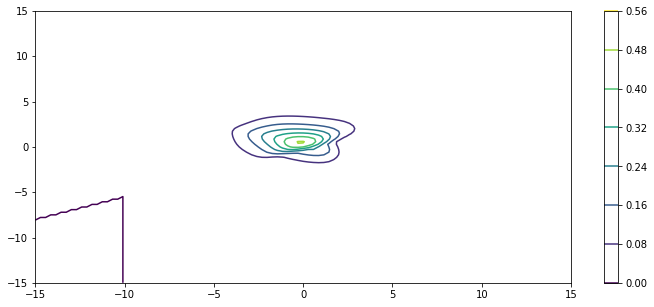

In [106]:
fig = plt.figure(figsize=(12,5))

x = np.linspace(-15, 15, 105)
y = np.linspace(-15, 15, 105)
X, Y = np.meshgrid(x, y)


cvals = np.linspace(0, 1, 100)
n_state = 0
coefs = revec[:, n_state].copy()
#coefs = evec[:, n_state].copy()
#coefs[:h.alpha.dim] = 0
#coefs[h.alpha.dim+h.beta.dim:] = 0


psi = np.array([[hr.splinef(coefs, xi, yi, idx=2) for xi in x] for yi in y])
psi_real = np.real(psi)
psi_imag = np.imag(psi)
psi_ampl = np.abs(psi)

contour1 = plt.contour(X, Y, psi_ampl, cvals=cvals)
fig.colorbar(contour1)